In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

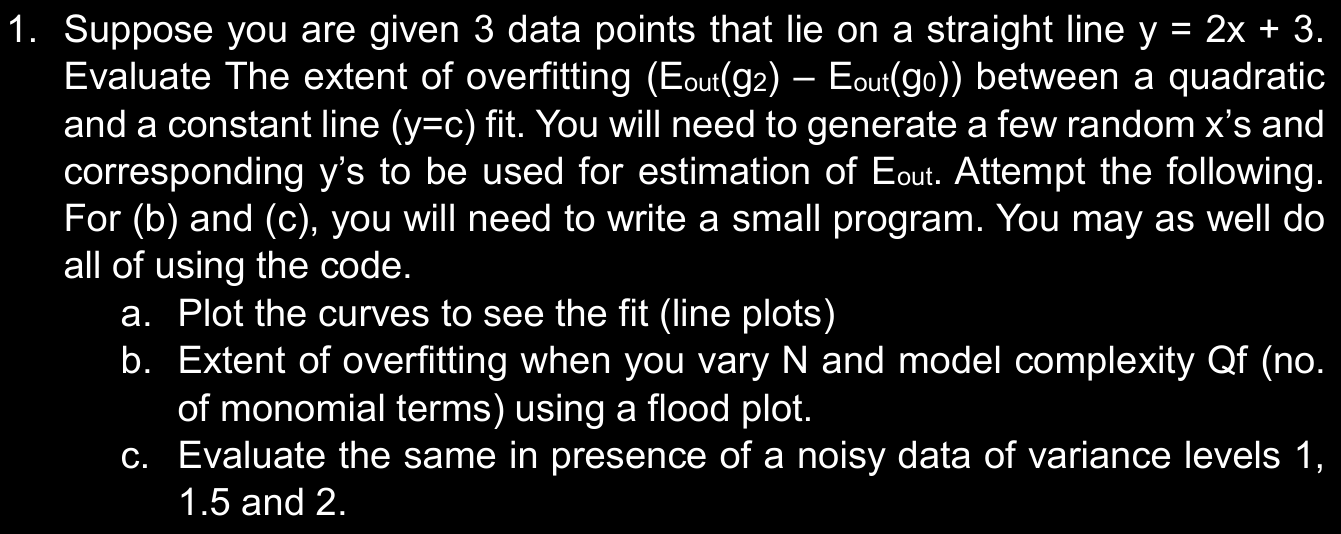

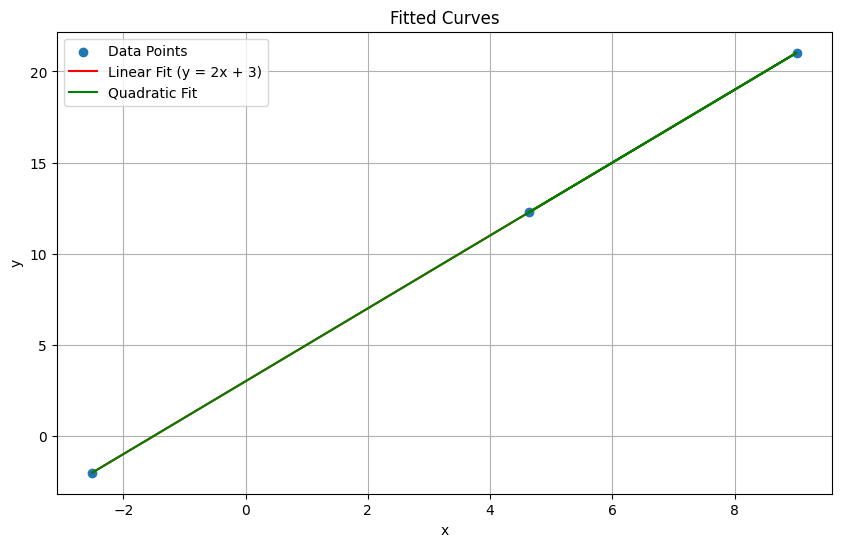

Extent of overfitting (Eout(g2) - Eout(g0)):  -2.9713760763324776e-29


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data points lying on the line y = 2x + 3
def generate_data_points(n):
    np.random.seed(42)  # for reproducibility
    x = np.random.uniform(-10, 10, n)
    y = 2 * x + 3
    return x, y

# Function to fit a quadratic function to the data
def fit_quadratic(x, y):
    return np.polyfit(x, y, 2)

# Function to calculate out-of-sample error
def calculate_eout(coefficients, x_test, y_test):
    y_pred = np.polyval(coefficients, x_test)
    return np.mean((y_pred - y_test) ** 2)

# Function to plot the curves
def plot_curves(x, y, coefficients_linear, coefficients_quadratic):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Data Points')
    
    # Plot linear fit
    plt.plot(x, np.polyval(coefficients_linear, x), color='red', label='Linear Fit (y = 2x + 3)')
    
    # Plot quadratic fit
    plt.plot(x, np.polyval(coefficients_quadratic, x), color='green', label='Quadratic Fit')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Fitted Curves')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function
def main():
    N = 3  # Number of data points
    x, y = generate_data_points(N)
    
    # Fit linear model
    coefficients_linear = np.polyfit(x, y, 1)
    
    # Fit quadratic model
    coefficients_quadratic = fit_quadratic(x, y)
    
    # Plot the curves
    plot_curves(x, y, coefficients_linear, coefficients_quadratic)
    
    # Calculate out-of-sample errors
    e_out_linear = calculate_eout(coefficients_linear, x, y)
    e_out_quadratic = calculate_eout(coefficients_quadratic, x, y)
    
    # Calculate extent of overfitting
    extent_of_overfitting = e_out_quadratic - e_out_linear
    print("Extent of overfitting (Eout(g2) - Eout(g0)): ", extent_of_overfitting)

if __name__ == "__main__":
    main()


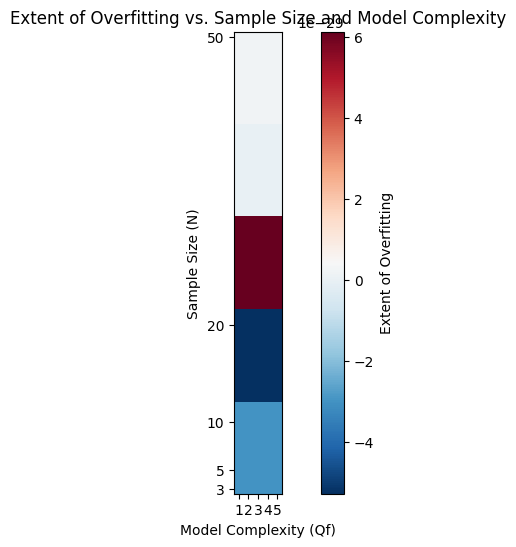

In [3]:
# Function to calculate extent of overfitting
def extent_of_overfitting(x, y, model_type='linear'):
    if model_type == 'linear':
        coefficients_linear = np.polyfit(x, y, 1)
        e_out_linear = calculate_eout(coefficients_linear, x, y)
        return e_out_linear
    elif model_type == 'quadratic':
        coefficients_quadratic = fit_quadratic(x, y)
        e_out_quadratic = calculate_eout(coefficients_quadratic, x, y)
        return e_out_quadratic

# Function to generate flood plot for extent of overfitting
def flood_plot():
    N_values = [3, 5, 10, 20, 50]
    Qf_values = [1, 2, 3, 4, 5]
    extent_of_overfitting_values = np.zeros((len(N_values), len(Qf_values)))

    for i, N in enumerate(N_values):
        for j, Qf in enumerate(Qf_values):
            x, y = generate_data_points(N)
            e_out_linear = extent_of_overfitting(x, y, 'linear')
            e_out_quadratic = extent_of_overfitting(x, y, 'quadratic')
            extent_of_overfitting_values[i, j] = e_out_quadratic - e_out_linear

    plt.figure(figsize=(10, 6))
    plt.imshow(extent_of_overfitting_values, extent=[min(Qf_values)-0.5, max(Qf_values)+0.5, min(N_values)-0.5, max(N_values)+0.5], cmap='RdBu_r', origin='lower')
    plt.colorbar(label='Extent of Overfitting')
    plt.xticks(Qf_values)
    plt.yticks(N_values)
    plt.xlabel('Model Complexity (Qf)')
    plt.ylabel('Sample Size (N)')
    plt.title('Extent of Overfitting vs. Sample Size and Model Complexity')
    plt.grid(False)
    plt.show()

# Main function
def main():
    flood_plot()

if __name__ == "__main__":
    main()

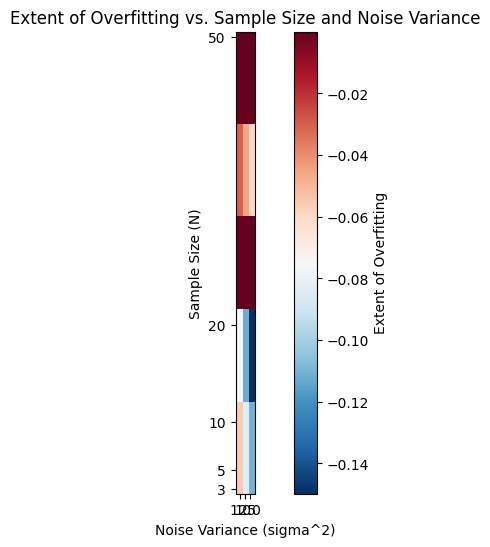

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate noisy data points lying on the line y = 2x + 3
def generate_noisy_data_points(n, variance):
    np.random.seed(42)  # for reproducibility
    x = np.random.uniform(-10, 10, n)
    noise = np.random.normal(0, np.sqrt(variance), n)
    y = 2 * x + 3 + noise
    return x, y

# Function to calculate extent of overfitting
def extent_of_overfitting(x, y, model_type='linear'):
    if model_type == 'linear':
        coefficients_linear = np.polyfit(x, y, 1)
        e_out_linear = calculate_eout(coefficients_linear, x, y)
        return e_out_linear
    elif model_type == 'quadratic':
        coefficients_quadratic = fit_quadratic(x, y)
        e_out_quadratic = calculate_eout(coefficients_quadratic, x, y)
        return e_out_quadratic

# Function to generate flood plot for extent of overfitting with noise
def flood_plot_with_noise():
    N_values = [3, 5, 10, 20, 50]
    variance_values = [1, 1.5, 2]
    extent_of_overfitting_values = np.zeros((len(N_values), len(variance_values)))

    for i, N in enumerate(N_values):
        for j, variance in enumerate(variance_values):
            x, y = generate_noisy_data_points(N, variance)
            e_out_linear = extent_of_overfitting(x, y, 'linear')
            e_out_quadratic = extent_of_overfitting(x, y, 'quadratic')
            extent_of_overfitting_values[i, j] = e_out_quadratic - e_out_linear

    plt.figure(figsize=(10, 6))
    plt.imshow(extent_of_overfitting_values, extent=[min(variance_values)-0.5, max(variance_values)+0.5, min(N_values)-0.5, max(N_values)+0.5], cmap='RdBu_r', origin='lower')
    plt.colorbar(label='Extent of Overfitting')
    plt.xticks(variance_values)
    plt.yticks(N_values)
    plt.xlabel('Noise Variance (sigma^2)')
    plt.ylabel('Sample Size (N)')
    plt.title('Extent of Overfitting vs. Sample Size and Noise Variance')
    plt.grid(False)
    plt.show()

# Main function
def main():
    flood_plot_with_noise()

if __name__ == "__main__":
    main()


In [5]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# a. Regularization using the analytical (closed-form) solution
# Define a list of lambda values
lambda_values = [0, 0.00001, 0.0001, 0.001, 0.01]

for l in lambda_values:
    # Solve Ridge Regression analytically
    ridge = Ridge(alpha=l, solver='cholesky')
    ridge.fit(X_train, y_train)
    print("Lambda =", l)
    print("Optimal weights (Ridge Regression):", ridge.coef_)

# b. Using scikit-learn's Ridge Regression module
# Choose a lambda value
lambda_value = 0.001
ridge_sklearn = Ridge(alpha=lambda_value)
ridge_sklearn.fit(X_train, y_train)
print("\nUsing scikit-learn's Ridge Regression module")
print("Optimal weights (Ridge Regression):", ridge_sklearn.coef_)

# c. Ridge Regression for classification on the Iris dataset
# We'll combine Ridge Regression with Logistic Regression
from sklearn.linear_model import LogisticRegression

# Use Ridge Regression as a classifier
ridge_classifier = LogisticRegression(penalty='l2', C=1/lambda_value, solver='liblinear', multi_class='auto')
ridge_classifier.fit(X_train, y_train)
y_pred = ridge_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nRidge Regression for classification (Accuracy):", accuracy)


Lambda = 0
Optimal weights (Ridge Regression): [-0.11633479 -0.05977785  0.25491375  0.54759598]
Lambda = 1e-05
Optimal weights (Ridge Regression): [-0.11633488 -0.05977769  0.2549142   0.54759499]
Lambda = 0.0001
Optimal weights (Ridge Regression): [-0.11633565 -0.05977623  0.2549183   0.54758606]
Lambda = 0.001
Optimal weights (Ridge Regression): [-0.11634339 -0.05976161  0.25495931  0.54749682]
Lambda = 0.01
Optimal weights (Ridge Regression): [-0.11641981 -0.05961637  0.25536766  0.54660729]

Using scikit-learn's Ridge Regression module
Optimal weights (Ridge Regression): [-0.11634339 -0.05976161  0.25495931  0.54749682]

Ridge Regression for classification (Accuracy): 1.0
